In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from rlxutils import subplots
from itertools import product

sys.path.append("..")
from lib import io
from lib import sar

In [2]:
base_path = "/home/rlx/data/sar-recovery"
date = '20100520'


## load scatter matrix from files


In [3]:
sm = io.load_bcn_scatter_matrix(base_path, date)
sm.shape

(4402, 1602, 2, 2)

## compute coherence matrix pixel wise (no statistics for sliding window, just per pixel)


In [4]:
cm = sar.compute_coherence_matrix(sm)
cm.shape

(4402, 1602, 3, 3)

## check manual comput of coherence matrix at a random pixel

In [9]:
# select a random pixel
y = np.random.randint(sm.shape[0])
x = np.random.randint(sm.shape[1])


In [24]:
# scatter matrix at pixel
psm = sm[y,x]

sq2 = np.sqrt(2)

# manually compute coherence matrix at that pixel
pcm = np.r_[
            [[psm[0,0]*psm[0,0].conjugate(),     sq2*psm[0,0]*psm[0,1].conjugate(),     psm[0,0]*psm[1,1].conjugate()],  # hh^2   hh*hv  hh*vv
             [sq2*psm[0,1]*psm[0,0].conjugate(),   2*psm[0,1]*psm[0,1].conjugate(), sq2*psm[0,1]*psm[1,1].conjugate()],  # hv*hh  hv^2   hv*vv
             [psm[1,1]*psm[0,0].conjugate(),     sq2*psm[1,1]*psm[0,1].conjugate(),     psm[1,1]*psm[1,1].conjugate()]   # vv*hh  vv*hv  vv*vv
            ]
].astype(cm.dtype)
    
pcm.shape

(3, 3)

In [26]:
# coherence matrix at selected pixel
pcm

array([[ 8317.909     +0.j    ,  -130.19193+3153.4915j,
        -1192.0911 -2911.562j ],
       [ -130.19193-3153.4915j,  1197.5917    +0.j    ,
        -1085.1748  +497.5182j],
       [-1192.0911 +2911.562j , -1085.1748  -497.5182j,
         1189.9956    +0.j    ]], dtype=complex64)

In [28]:
# check
np.allclose(pcm, cm[y,x], atol=1e-5)

True

## visualize amplitude of coherence matrix

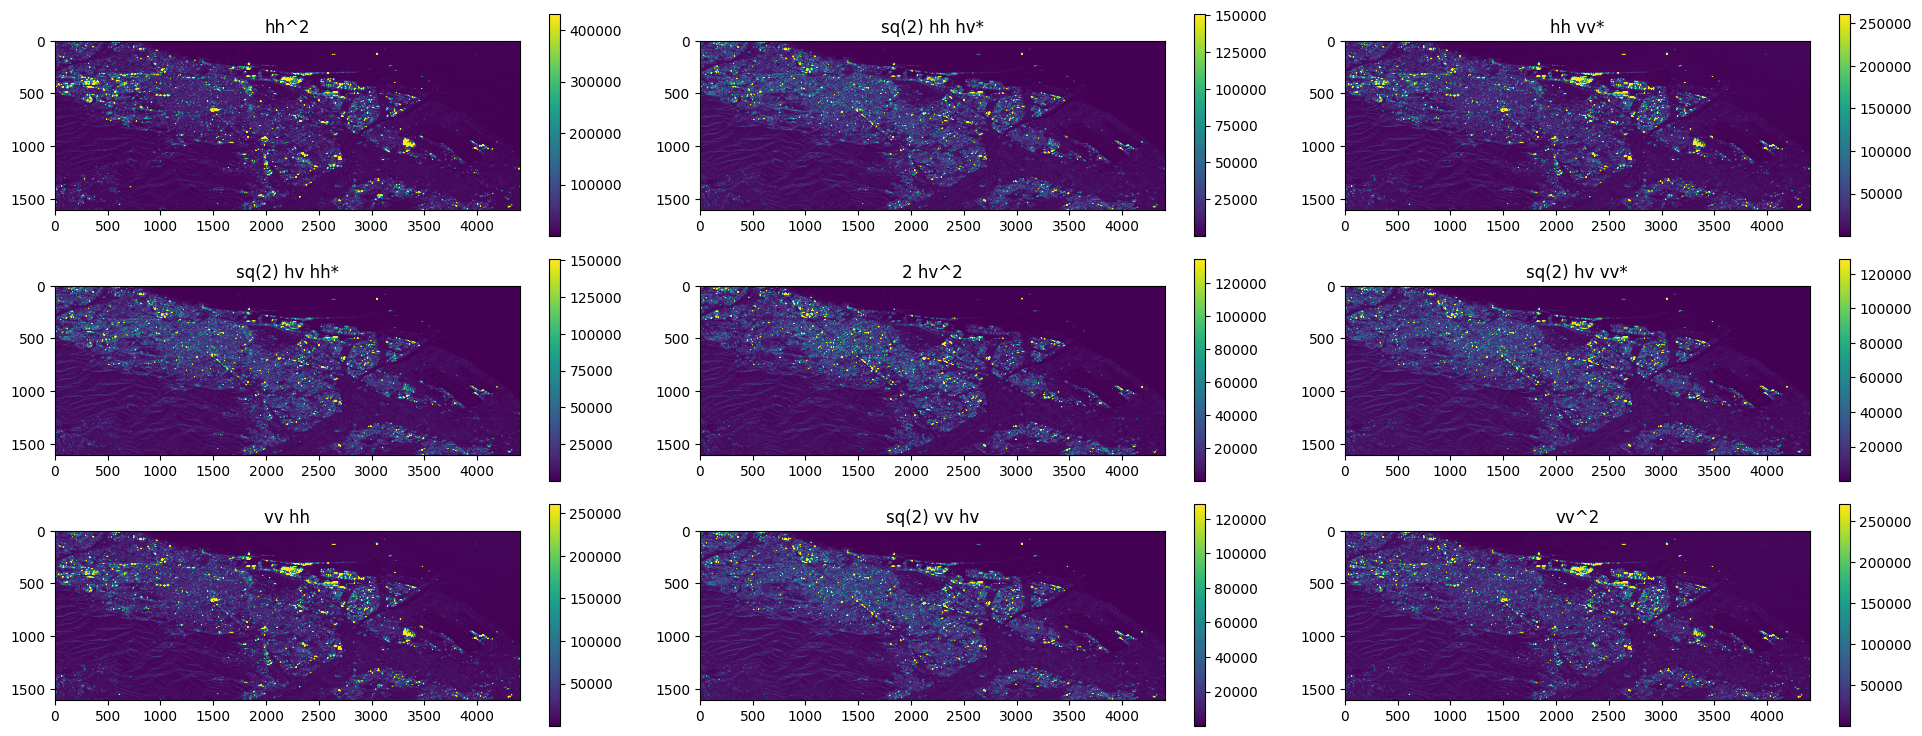

In [29]:
labels = {(0, 0): "hh^2",         (0, 1): "sq(2) hh hv*" , (0, 2): "hh vv*", 
          (1, 0): "sq(2) hv hh*", (1, 1): "2 hv^2",        (1, 2): "sq(2) hv vv*", 
          (2, 0): "vv hh",        (2, 1): "sq(2) vv hv",   (2, 2): "vv^2"}

for ax, (a,b) in subplots(list(product(range(3), range(3))), n_cols=3, usizex=6.5, usizey=2.5):
    plt.title(labels[(a,b)])
    z = np.abs(cm[:,:,a,b]).T
    vmin, vmax = np.percentile(z, [1,99])
    plt.imshow(z, vmin=vmin, vmax=vmax)
    plt.colorbar()

## visualize phase of coherence matrix

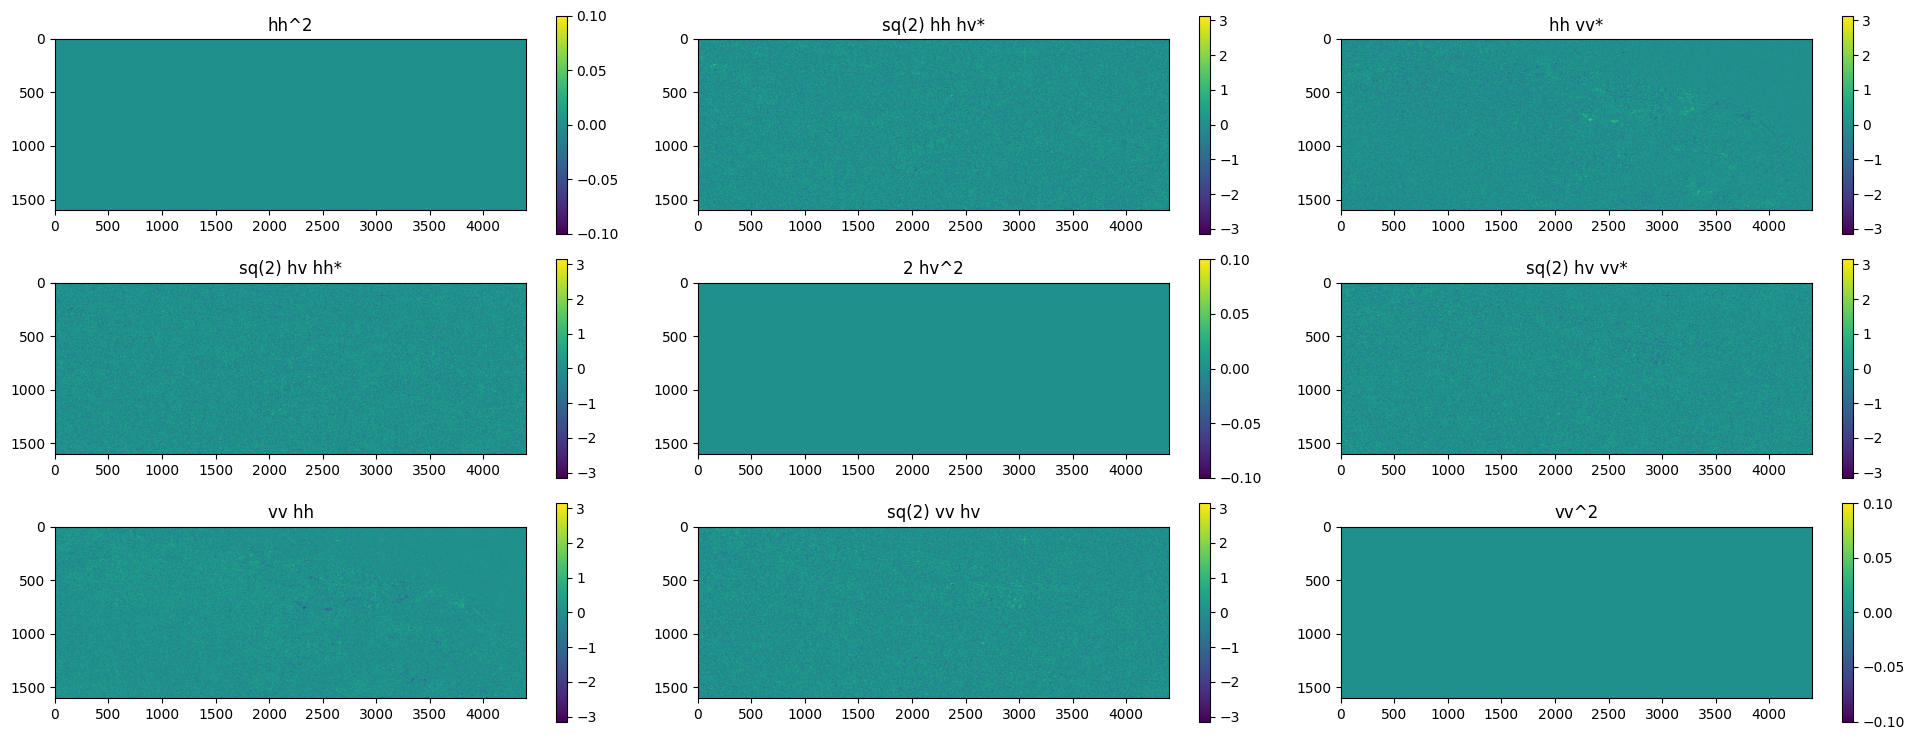

In [30]:
labels = {(0, 0): "hh^2",         (0, 1): "sq(2) hh hv*" , (0, 2): "hh vv*", 
          (1, 0): "sq(2) hv hh*", (1, 1): "2 hv^2",        (1, 2): "sq(2) hv vv*", 
          (2, 0): "vv hh",        (2, 1): "sq(2) vv hv",   (2, 2): "vv^2"}

for ax, (a,b) in subplots(list(product(range(3), range(3))), n_cols=3, usizex=6.5, usizey=2.5):
    plt.title(labels[(a,b)])
    z = np.angle(cm[:,:,a,b]).T
    plt.imshow(z)
    plt.colorbar()